# **Chapstone Project: Classification Using Machine Learning**

In [1]:
# All Modules are we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# print(plt.style.available) # Bisa pake style mana aja. Yg penting enak dilihat
plt.style.use('seaborn-darkgrid')

In [2]:
# Melihat 10 data teratas dgn style gak biasa
dsu = pd.read_csv("C:/Users/asus/Anaconda3/DSU/Supervised/dsu.csv")
ds = dsu.head(11)
dsu1 = ds.style.background_gradient(cmap='Greens')
dsu1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [4]:
# Info datatype berdasarkan data yg dimiliki
dsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Report statistik data nya
dsu.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Cek Nilai Null
dsu.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# **Grafik klasifikasi income, berdasarkan beberapa parameter yg digunakan**

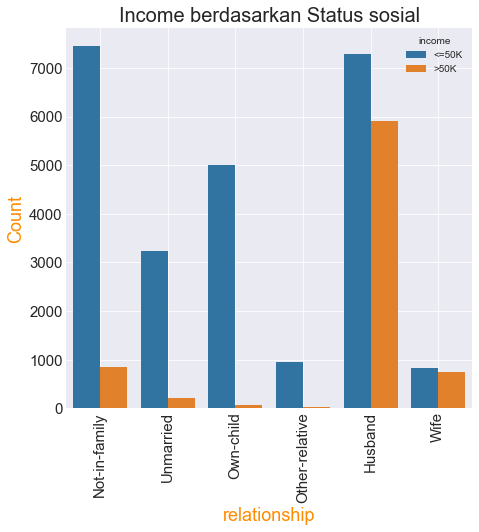

In [6]:
# Grafik Income berdasarkan status sosial 
plt.figure(figsize=(16,7))

grafik_1 = ["relationship"]

for i in range(1):
    plt.title('Income berdasarkan Hubungan dan Status Perkawinan',size=20)
    plt.subplot(1,2,i+1)
    sns.countplot(x=grafik_1[i], data=dsu, hue="income")
    plt.xlabel(grafik_1[i], color="darkorange", fontsize=18)
    plt.ylabel("Count", color="darkorange", fontsize=18)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
plt.title('Income berdasarkan Status sosial',size=20)
plt.show()    

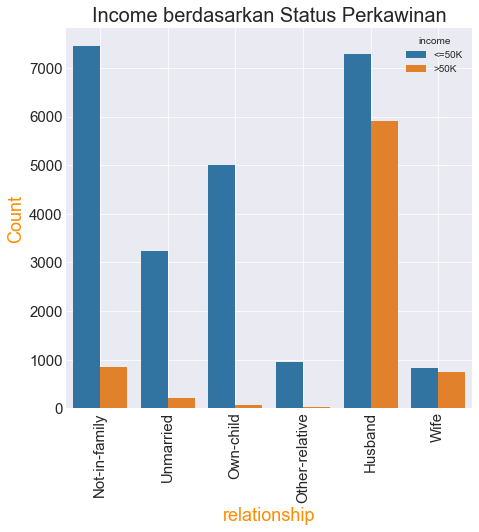

In [7]:
# Grafik Income berdasarkan status perkawinan
plt.figure(figsize=(16,7))

grafik_2 = ["relationship"]

for i in range(1):
    plt.subplot(1,2,i+1)
    sns.countplot(x=grafik_2[i], data=dsu, hue="income")
    plt.xlabel(grafik_2[i], color="darkorange", fontsize=18)
    plt.ylabel("Count", color="darkorange", fontsize=18)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)
    
plt.title('Income berdasarkan Status Perkawinan',size=20)
plt.show()    

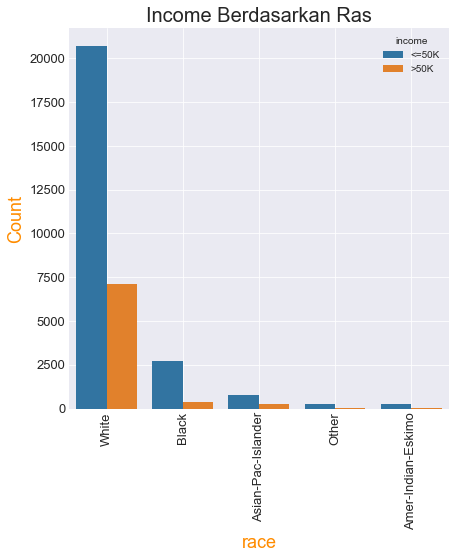

In [8]:
# Grafik Income berdasarkan Ras/Keturunan
plt.figure(figsize=(15,7))

grafik_3=["race"]

for i in range(1):
    plt.subplot(1,2,i+1)
    sns.countplot(x=grafik_3[i],data=dsu,hue='income')
    plt.xlabel(grafik_3[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)
    plt.grid(True)
    
plt.title('Income Berdasarkan Ras',size=20)
plt.show()

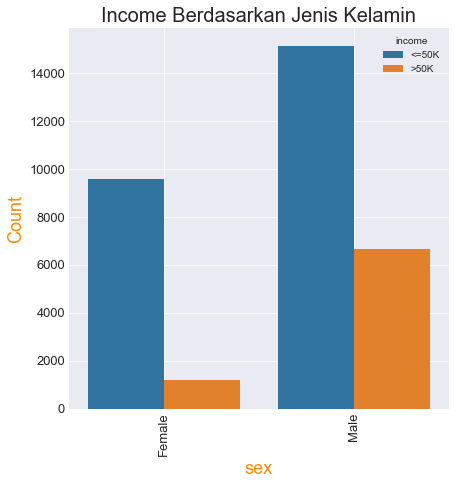

In [9]:
# Grafik Income berdasarkan Jenis Kelamin
plt.figure(figsize=(15,7))

grafik_4=["sex"]

for i in range(1):
    plt.subplot(1,2,i+1)
    sns.countplot(x=grafik_4[i], data=dsu, hue='income')
    plt.xlabel(grafik_4[i], color="darkorange", fontsize=18)
    plt.ylabel("Count", color="darkorange", fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90, fontsize=13)
    plt.grid(True)
    
plt.title('Income Berdasarkan Jenis Kelamin',size=20)
plt.show()

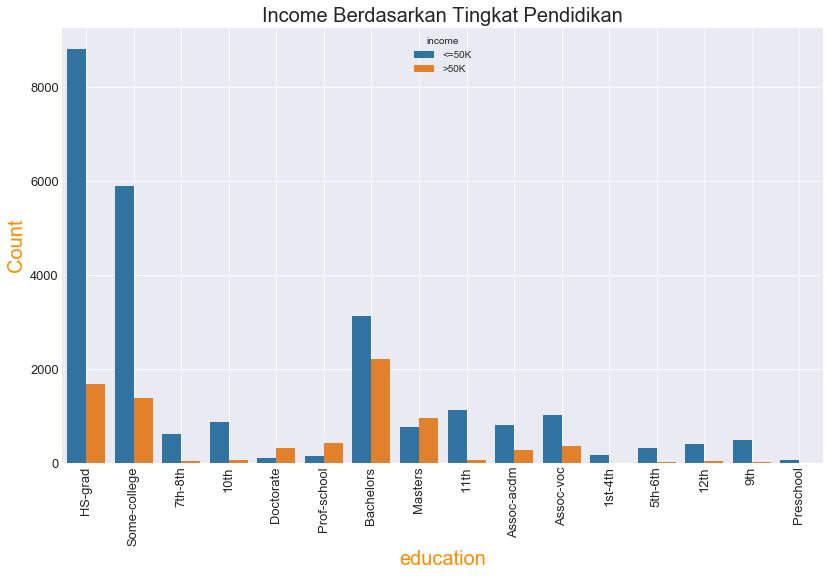

In [10]:
# Grafik Income berdasarkan  Pendidikan
plt.figure(figsize=(30,8))

grafik_3 = ["education"]

for i in range(1):
    plt.subplot(1,2,i+1)
    sns.countplot(x=grafik_3[i], data=dsu, hue="income")
    plt.xlabel(grafik_3[i], color="darkorange", fontsize=20)
    plt.ylabel("Count", color="darkorange", fontsize=20)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)
    plt.grid(True)
plt.title('Income Berdasarkan Tingkat Pendidikan',size=20)
plt.show()

# **Melakukan klasifikasi dan melihat nilai Akurasi menggunakan beberapa metode**

In [3]:
# Memisahkan antara data dan label menggunakan fungsi pop
y = dsu.pop('income')
# Mengelompokkan 2 kolom yg memiliki interpretasi sama yaitu education
dsu.groupby('education').nunique()['education.num']

education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: education.num, dtype: int64

In [4]:
# Menghapus kolom education dan memasukkan fungsi dummies kedalam data untuk mendapatkan unique value di setiap kolomnya
dsu.drop('education', axis = 1, inplace = True)
dsu = pd.get_dummies(dsu)
print(dsu.shape)
dsu.head()

(32561, 92)


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Split dgn data train = 80% dan data test = 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(dsu, y, test_size=0.2, random_state=42)
print('jumlah data train : ',len(X_train))
print('jumlah data test : ',len(X_test))

jumlah data train :  26048
jumlah data test :  6513


In [6]:
# Modelling dgn KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
prediksi = model.predict(X_test)
print('Nilai Akurasi dari model KNN : ', accuracy_score(prediksi, y_test))
print(confusion_matrix(prediksi, y_test))

Nilai Akurasi dari model KNN :  0.7787501919238446
[[4605 1070]
 [ 371  467]]


In [8]:
# Modelling dgn Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
prediksi = model.predict(X_test)
print('Nilai Akurasi dari model Decision Tree Classifier : ', accuracy_score(prediksi, y_test))
print(confusion_matrix(prediksi, y_test))

Nilai Akurasi dari model Decision Tree Classifier :  0.8536772608628896
[[4748  725]
 [ 228  812]]


In [9]:
# Modelling dgn Support Vektor Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

data_set = pd.read_csv("C:/Users/asus/Anaconda3/DSU/Supervised/dsu.csv")

# Preprocessing dgn Mengubah nilai income >50K dan <=50K menjadi data boolean yaitu 0 dan 1 
income_set = set(data_set['income'])
data_set['income'] = data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

#Variabel x sbg parameter yg digunakan 
X = data_set[['education.num', 'age', 'hours.per.week', 'capital.gain']]

# variabel Y 
Y = data_set['income']

# Split dgn data train = 80% dan data test = 20%
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

classifier = SVC()

model = classifier.fit(X_train,Y_train)
prediksi = classifier.predict(x_test)
print(model)
print('\nNilai Akurasi dari model Support Vektor Classifier :', accuracy_score(prediksi, y_test))
print(confusion_matrix(prediksi, y_test))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Nilai Akurasi dari model Support Vektor Classifier : 0.8023952095808383
[[4712 1033]
 [ 254  514]]


# **Membuat Map Korelasi**

In [10]:
# Melihat seluruh kategori yg ada di kolom occupation
occupation_set = set(data_set['occupation'])
print(occupation_set)

{'Other-service', 'Exec-managerial', '?', 'Handlers-cleaners', 'Transport-moving', 'Armed-Forces', 'Tech-support', 'Prof-specialty', 'Adm-clerical', 'Priv-house-serv', 'Farming-fishing', 'Protective-serv', 'Craft-repair', 'Machine-op-inspct', 'Sales'}


In [11]:
# Membuat seluruh kategori di kolom occupation sebagai nilai numerik.
data_set['occupation'] = data_set['occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [12]:
# Melihat seluruh kategori ras yg ada di kolom race
race_set = set(data_set['race'])
print(race_set)

{'Black', 'Amer-Indian-Eskimo', 'Other', 'Asian-Pac-Islander', 'White'}


In [13]:
# Membuat seluruh kategori di kolom race sebagai nilai numerik.
data_set['race'] = data_set['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [14]:
# Melihat seluruh status perkawinan yg ada di kolom marital.status
mstatus_set = set(data_set['marital.status'])
print(mstatus_set)

{'Married-AF-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married'}


In [15]:
# Membuat seluruh kategori di kolom marital.status sebagai nilai numerik.
data_set['marital.status'] = data_set['marital.status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [16]:
# Melihat seluruh Negara di kolom native.country
native_set = set(data_set['native.country'])
print(native_set)

{'Puerto-Rico', 'United-States', 'El-Salvador', 'China', 'Canada', 'Jamaica', 'France', 'Haiti', 'Columbia', 'Germany', 'Iran', 'Dominican-Republic', 'Vietnam', 'Peru', 'Poland', 'Honduras', 'Ireland', 'Cambodia', 'Portugal', 'Guatemala', 'Mexico', 'India', 'Thailand', 'Yugoslavia', 'Greece', 'Scotland', 'England', 'Cuba', 'Outlying-US(Guam-USVI-etc)', 'Hungary', 'Japan', 'Taiwan', 'Hong', '?', 'Nicaragua', 'South', 'Ecuador', 'Trinadad&Tobago', 'Holand-Netherlands', 'Laos', 'Italy', 'Philippines'}


In [17]:
# Membuat seluruh kategori di kolom native.country sebagai nilai numerik.
data_set['native.country'] = data_set['native.country'].map({'Nicaragua': 0, 'South': 1, 'Japan': 2, 
                                                       'United-States': 3, 'Germany': 4, 'Thailand': 5,
                                                       'Puerto-Rico': 6, 'India': 7, 
                                                       'Yugoslavia': 8, 'Canada': 9, 'Vietnam': 10, 
                                                       'Ireland': 11, 'Scotland': 12, 'Dominican-Republic': 13, 
                                                       'China': 14, 'Philippines': 15, '?': 16,
                                                        'Peru': 17, 'Trinadad&Tobago': 18, 'Ecuador': 19,
                                                        'Italy': 20, 'Haiti': 21, 'Poland': 22, 
                                                        'Portugal': 23, 'Laos': 24, 'Taiwan': 25,
                                                        'Columbia': 26, 'Mexico': 27, 'Outlying-US(Guam-USVI-etc)': 28,
                                                        'Cuba': 29, 'Cambodia': 30, 'Iran': 31, 'Hong': 32,
                                                        'Greece': 33, 'El-Salvador': 34, 'France': 35, 'Holand-Netherlands': 36,
                                                        'Honduras': 37, 'Guatemala': 38, 'England': 39, 'Hungary': 40,
                                                        'Jamaica': 41}).astype(int)

In [18]:
# Melihat seluruh Jenis pekerjaan yg ada di kolom workclas
work_set = set(data_set['workclass'])
print(work_set)

{'Self-emp-not-inc', '?', 'Federal-gov', 'Without-pay', 'Never-worked', 'Private', 'Self-emp-inc', 'State-gov', 'Local-gov'}


In [19]:
# Membuat seluruh kategori di kolom Jenis pekerjaan sebagai nilai numerik.
data_set['workclass'] = data_set['workclass'].map({'Self-emp-inc': 0, 'Private': 1, 
                                                    'Federal-gov': 2, 'Without-pay': 3, 'Never-worked': 4, 
                                                    'State-gov': 5, 'Local-gov': 6, 'Self-emp-not-inc': 7,
                                                    '?': 8}).astype(int)

In [20]:
# Melihat seluruh status hubungan sosial yg ada di kolom relationship
relation_set = set(data_set['relationship'])
print(relation_set)

{'Wife', 'Unmarried', 'Other-relative', 'Own-child', 'Husband', 'Not-in-family'}


In [21]:
# Membuat seluruh kategori di kolom relationship sebagai nilai numerik.
data_set['relationship'] = data_set['relationship'].map({'Not-in-family': 0, 'Husband': 1,
                                                         'Unmarried': 3, 'Other-relative': 4,
                                                        'Wife': 5, 'Own-child':6}).astype(int)

In [22]:
# Melihat seluruh Jenis kelamin yg ada di kolom sex
sex_set = set(data_set['sex'])
print(sex_set)

{'Female', 'Male'}


In [23]:
# Membuat seluruh kategori di kolom Jenis kelamin sebagai nilai numerik.
data_set['sex'] = data_set['sex'].map({'Male': 0, 'Female': 1,}).astype(int)

# Mencetak hasil korelasi matrix nya

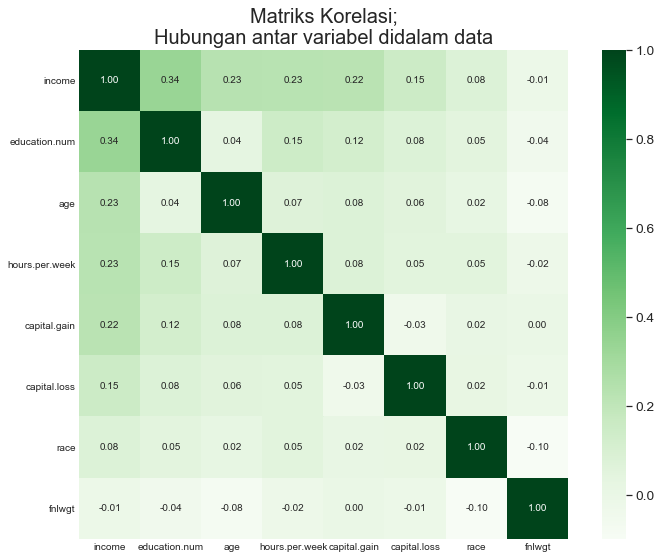

In [24]:
corrmat = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap="Greens", fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Matriks Korelasi;\nHubungan antar variabel didalam data', size=20)
plt.show()